## DACON 금융문자분석
1. import data
2. preprocessing

   1. 특수문자 제거
   2. Kospacing으로 띄어쓰기 수정
   
3. modeling
4. prediction

### 1 import data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive/Dacon

/content/drive/My Drive/Dacon


In [0]:
# import package -------------------------
# -*- coding: cp949 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import pandas_profiling as pp

from IPython.display import Image
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="KOPUBDOTUMMEDIUM.TTF").get_name()
rc('font', family=font_name)

In [0]:
# load data -----------------------
train = pd.read_csv('train.csv', encoding='utf-8')
public_test = pd.read_csv('public_test.csv', encoding='utf-8')

In [0]:
train.head()

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0


### 2 pykospacing

In [0]:
# import package ---------------
!pip3 install konlpy

from konlpy.tag import Okt
import re  
okt=Okt()

     |████████████████████████████████| 19.4MB 11.0MB/s 
     |████████████████████████████████| 491kB 59.2MB/s 
     |████████████████████████████████| 92kB 13.6MB/s 
  Created wheel for JPype1: filename=JPype1-0.7.1-cp36-cp36m-linux_x86_64.whl size=2437769 sha256=bcfdcc0a8fcbf9c36a5dad96b8d2548a92cb70d5d97b5ad0a8f6a6171c46faff
  Stored in directory: /root/.cache/pip/wheels/b0/49/6a/4393ef8542c00becf80691bd242693db9e263d6e499323a984
Successfully built JPype1
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [0]:
# pykospacing
!pip install tensorflow
!pip install keras
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

from pykospacing import spacing

In [0]:
# pykospacing 돌려보기
ex1 = ham[1:4]

for n in range(len(ex1)):
  ex1[n] = spacing(ex1[n]) 

ex1

['오늘도 많이 웃으시는 하루 시작하세요 은행 진월동 VIP 라운지 올림',
 '안녕하십니까 고객님 은행입니다 금일 납부하셔야 할 금액은 원 입니다 감사합니다 새해 복 많이 받으십시오 은행 옥포 올림',
 '고객님 안녕하세요 은행 지점입니다 지난 한 해 동안 저희 지점에 보내주신 성원에 감사드립니다 설렘으로 시작한 년 소망하시는 일 모두 이 고객님의 가정에 늘 건강과 행복이 함께 하길 기 원하겠습니다 사랑하는 가족과 함께 정을 나누는 행복한 설 명절 보내세요 은행 지점 직원 일동']

In [0]:
test_2 = train.copy()
test_2.head()

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0


In [0]:
del test_2['year_month']
#test_2.set_index('id', inplace=True)
test_2.head()

,id,text,smishing
0,0,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0


In [0]:
test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295945 entries, 0 to 336378
Data columns (total 2 columns):
text        295945 non-null object
smishing    295945 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.8+ MB


In [0]:
test_2['text'].nunique(), test_2['smishing'].nunique()  # 중복 1개 존재

(295944, 2)

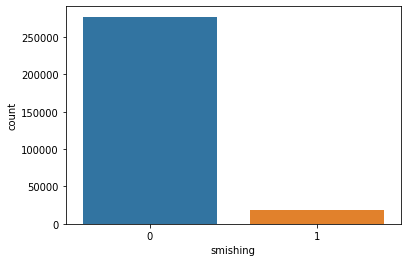

In [0]:
sns.countplot(x='smishing', data=test_2)

In [0]:
print(test_2.groupby('smishing').size().reset_index(name='count'))

   smishing   count
0         0  277242
1         1   18703


In [0]:
# data clensing
test_2['text'] = [re.sub('[0-9]', '', i) for i in test_2['text']]  # 숫자 제거
test_2['text'] = [re.sub('[^\w]', ' ', i) for i in test_2['text']]  # 특수문자 제거
test_2['text'] = [re.sub('[ㄱ-ㅎㅏ-ㅣ]', '', i) for i in test_2['text']]  # 자음, 모음 제거
test_2['text'] = [re.sub('XXX', ' ', i) for i in test_2['text']]  # XXX 제거

In [0]:
test_2

,text,smishing
id,,
0,은행성산 팀장입니다 행복한주말되세요,0
1,오늘도많이웃으시는하루시작하세요 은행 진월동VIP라운지 올림,0
2,안녕하십니까 고객님 은행입니다 금일 납부하셔야 할 금액은 원 입니다 감사합니다 ...,0
4,고객님안녕하세요 은행 지점입니다지난 한 해 동안 저희 지점에 보내주신 성원에...,0
5,월은 새로움이 가득 입니다 올 한해 더 많이행복한 한해되시길바랍니다,0
...,...,...
336373,고객님 열심히 달려왔던 년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으로 신년의 ...,0
336375,고객님실버웰빙신탁이 만기도래 예정입니다 남양주지점,0
336376,한해동안 은행과 함께 해주셔서 정말 감사드립니다 년 기해년을 맞이하며 가족의건강과...,0


In [0]:
aft_spc = list(test_2['text'])

for n in range(len(aft_spc)):
  aft_spc[n] = spacing(aft_spc[n]) 

aft_spc

In [0]:
aft_spc = pd.DataFrame(aft_spc)
aft_spc.columns = ['after spacing']

test_2['after_spacing'] = aft_spc